# Libraries

In [23]:
import pandas as pd
import missingno as msno

# Read files

In [24]:
df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')
df_example = pd.read_csv('./data/sample_submission.csv')

In [25]:
# First look
df_train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [26]:
df_test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


# EDA

## Objective variable

In [27]:
df_train.groupby('Transported').agg({'PassengerId':'count'})

,PassengerId
Transported,
False,4315
True,4378


The oobjective variable is valanced.

## Categorical variables

Let's take a look of the distribution of the categorical variables in the
trainig set

In [28]:
columns_count = ['HomePlanet','CryoSleep','Destination','VIP']

for col in columns_count:
    print(df_train[[col]].value_counts(normalize=True, dropna=False))

HomePlanet
Earth         0.529391
Europa        0.245140
Mars          0.202347
NaN           0.023122
dtype: float64
CryoSleep
False        0.625676
True         0.349362
NaN          0.024963
dtype: float64
Destination  
TRAPPIST-1e      0.680433
55 Cancri e      0.207063
PSO J318.5-22    0.091568
NaN              0.020936
dtype: float64
VIP  
False    0.953756
NaN      0.023352
True     0.022892
dtype: float64


Now let's take a look on how this categorical variables affect the
objective variable

<AxesSubplot:xlabel='HomePlanet'>

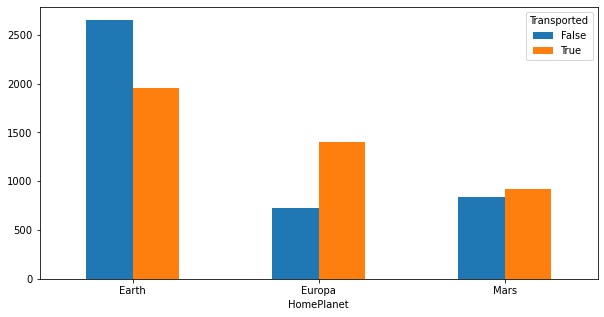

In [29]:
df_plot = pd.pivot_table(df_train, index='HomePlanet', columns='Transported',
                         values='PassengerId', aggfunc='count')

df_plot.plot.bar(figsize=(10,5), rot=0)

Seems like people from Earth get transported less than people from Europa
and people from Mars get transported in the same amounth.

<AxesSubplot:xlabel='Destination'>

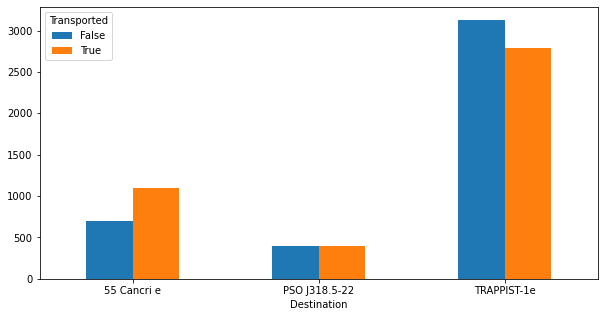

In [30]:
df_plot = pd.pivot_table(df_train, index='Destination', columns='Transported',
                         values='PassengerId', aggfunc='count')

df_plot.plot.bar(figsize=(10,5), rot=0)

Looks like people who's desination is 55 Cancri e get transported more and
people traveling to TRAPPIST-1e get more luck.

<AxesSubplot:xlabel='CryoSleep'>

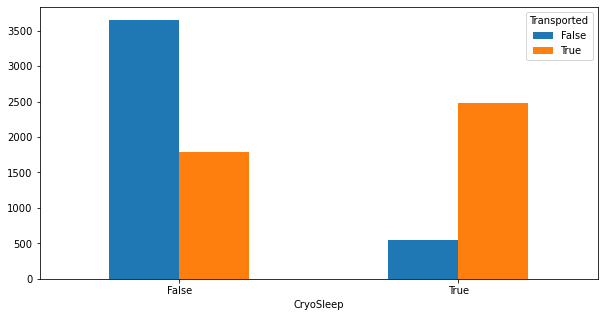

In [31]:
df_plot = pd.pivot_table(df_train, index='CryoSleep', columns='Transported',
                         values='PassengerId', aggfunc='count')

df_plot.plot.bar(figsize=(10,5), rot=0)

Here is clear that Cryo sleep afect the chances of being transported.

<AxesSubplot:xlabel='VIP'>

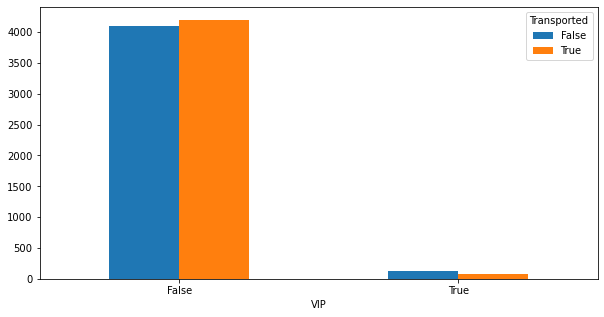

In [32]:
df_plot = pd.pivot_table(df_train, index='VIP', columns='Transported',
                         values='PassengerId', aggfunc='count')

df_plot.plot.bar(figsize=(10,5), rot=0)

In [33]:
df_plot

Transported,False,True
VIP,,
False,4093,4198
True,123,76


It seems that VIP does not affect the objective variable in adition to the
fact that there is almost no people in a VIP trip. I tinck is better not
use this variable in the model.

## Numeric variables

Let's see how the distribution of numerical variables looks like.

In [34]:
columns_num = ['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']

df_train[columns_num].describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


Most people did not spend money in the luxory amenities. Let's take a look
on the people who does spend money.

In [35]:
df_train.loc[df_train.RoomService!=0,['RoomService']].describe()

,RoomService
count,2935.000000
mean,651.632368
std,1005.556487
min,1.000000
25%,37.000000
50%,320.000000
75%,848.000000
max,14327.000000


In [36]:
df_train.loc[df_train.FoodCourt!=0,['FoodCourt']].describe()

,FoodCourt
count,3054.000000
mean,1276.436477
std,2488.548489
min,1.000000
25%,39.000000
50%,396.500000
75%,1255.750000
max,29813.000000


In [37]:
df_train.loc[df_train.ShoppingMall!=0,['ShoppingMall']].describe()

,ShoppingMall
count,2898.000000
mean,508.658385
std,948.906017
min,1.000000
25%,22.000000
50%,195.000000
75%,693.000000
max,23492.000000


In [38]:
df_train.loc[df_train.Spa!=0,['Spa']].describe()

,Spa
count,3186.000000
mean,831.070621
std,1737.733738
min,1.000000
25%,27.000000
50%,226.500000
75%,769.000000
max,22408.000000


In [39]:
df_train.loc[df_train.VRDeck!=0,['VRDeck']].describe()

,VRDeck
count,3010.000000
mean,861.392027
std,1797.300831
min,1.000000
25%,28.000000
50%,260.000000
75%,806.500000
max,24133.000000


Let's classify these variables into groups. There will bi 3 groups:
people who don't spend money, people who spend a little money
and people who spend more money.

And let's see how this groups afect the objective variable.

In [40]:
# Classify spend variables
spend = ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']

for col in spend:
    mean_value = df_train[col].mean()
    df_train[col+'_class'] = 0
    df_train.loc[(df_train[col]>0)&(df_train[col]<mean_value),col+'_class']=0.5
    df_train.loc[(df_train[col]>=mean_value),col+'_class'] = 1

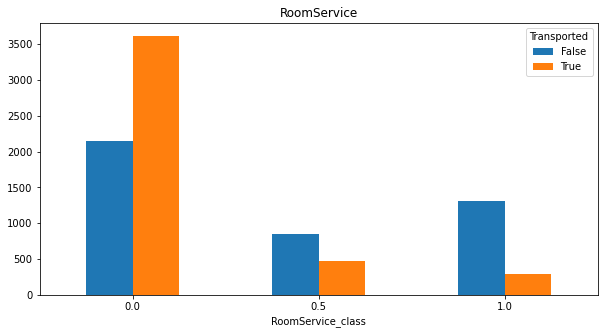

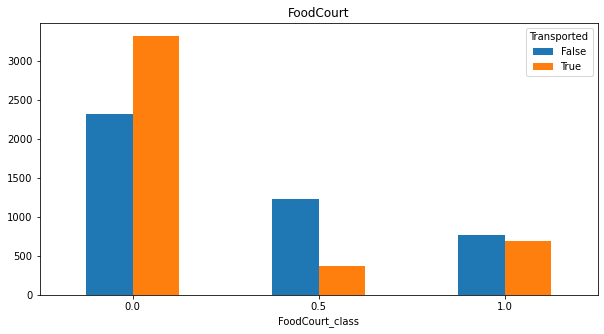

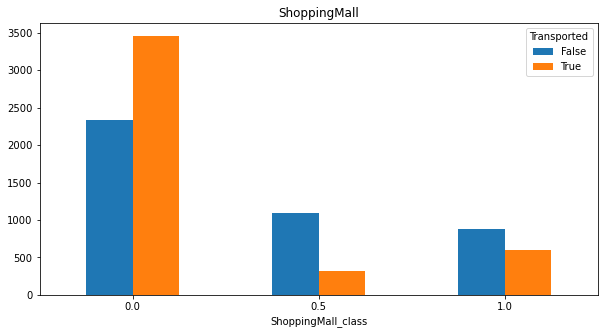

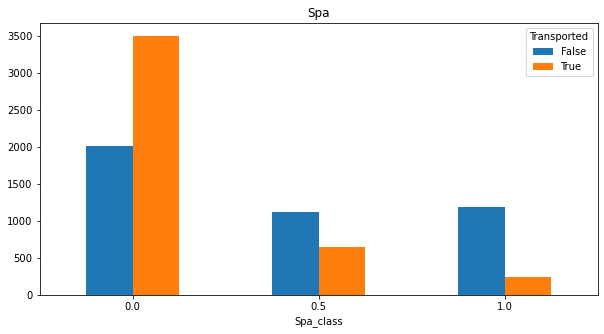

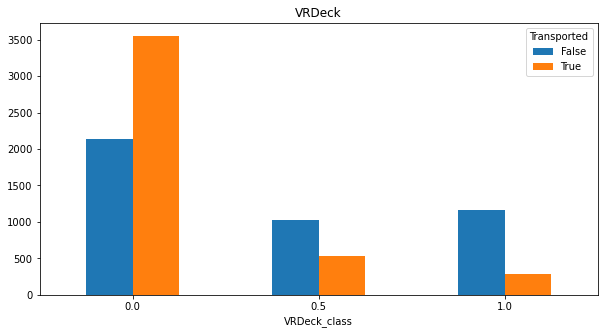

In [41]:
for col in spend:
    df_plot = pd.pivot_table(df_train, index=f'{col}_class',
                            columns='Transported', values='PassengerId',
                            aggfunc='count')

    df_plot.plot.bar(figsize=(10,5), rot=0, title=col)

It looks like people who doesn't spend money get transported most than
people who does spend money.

## Null values

In the next graph we can see missing values from every variable in the
traing set.

<AxesSubplot:>

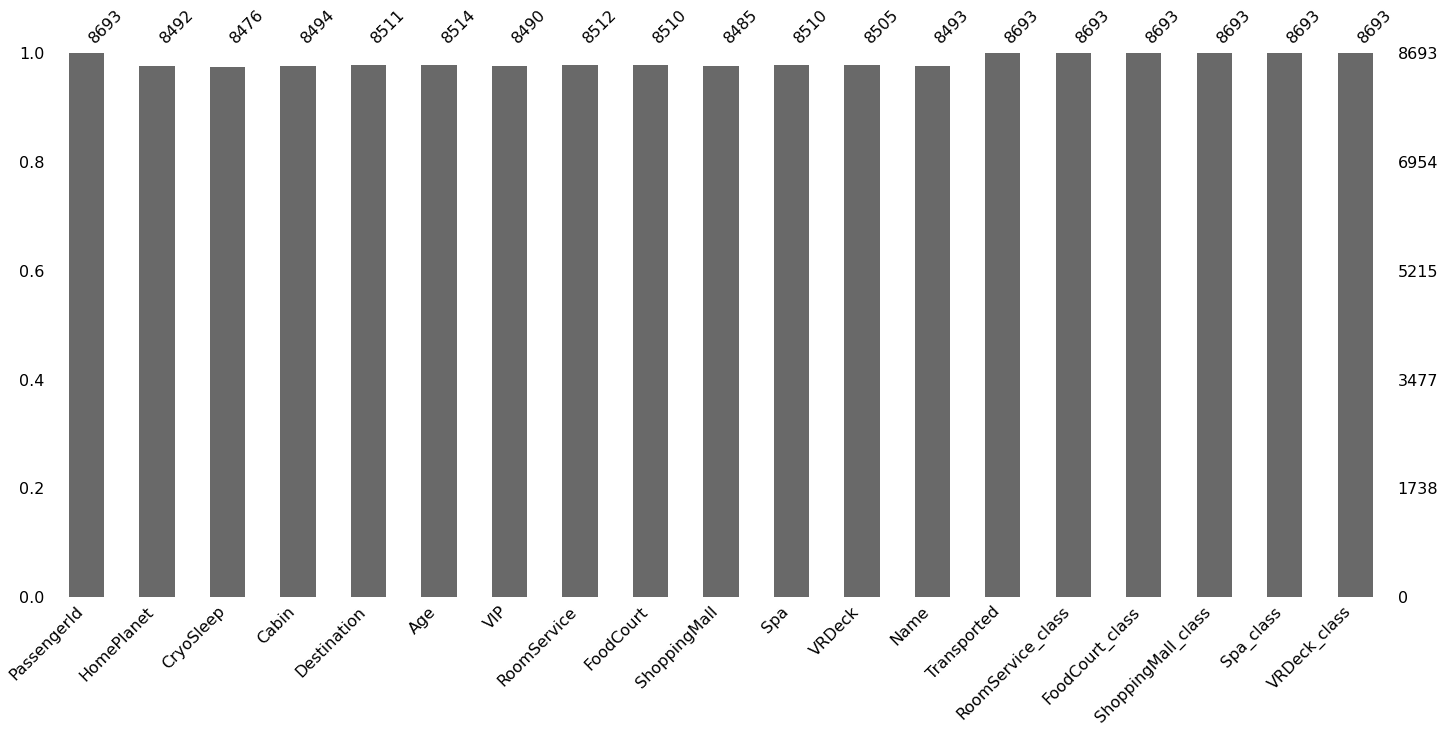

In [42]:
msno.bar(df_train)

# Deck and side

In [43]:
# Extract deck and side from the Cabin variable
df_train.Cabin = df_train.Cabin.fillna('none/none/none')
df_train[['Deck','Num','Side']] = df_train.Cabin.str.split('/', expand=True)

In [44]:
pd.pivot_table(df_train, index='Deck', columns='Transported',
              values='PassengerId', aggfunc='count', margins=True)

Transported,False,True,All
Deck,,,
A,129,127,256
B,207,572,779
C,239,508,747
D,271,207,478
E,563,313,876
F,1565,1229,2794
G,1238,1321,2559
T,4,1,5
none,99,100,199


In [45]:
pd.pivot_table(df_train, index='Side', columns='Transported',
              values='PassengerId', aggfunc='count', margins=True)

Transported,False,True,All
Side,,,
P,2308,1898,4206
S,1908,2380,4288
none,99,100,199
All,4315,4378,8693


In [46]:
len(df_train.Num.unique())

1818

## Graphic look of above tables

<AxesSubplot:xlabel='Deck'>

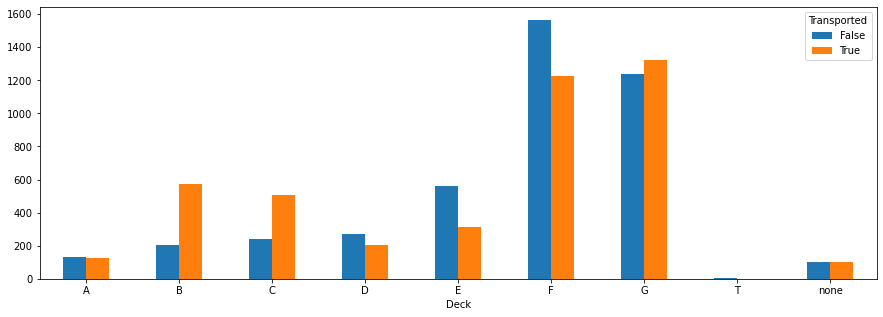

In [47]:
df_plot = pd.pivot_table(df_train, index='Deck', columns='Transported',
                         values='PassengerId', aggfunc='count')

df_plot.plot.bar(figsize=(15,5), rot=0)

It appears that Deck does affect if people is transported or not

<AxesSubplot:xlabel='Side'>

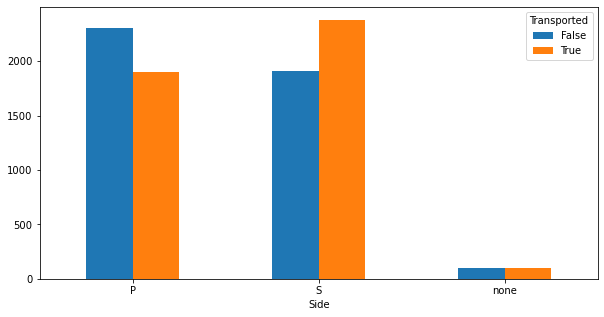

In [48]:
df_plot = pd.pivot_table(df_train, index='Side', columns='Transported',
                         values='PassengerId', aggfunc='count')

df_plot.plot.bar(figsize=(10,5), rot=0)

Side S looks more dangerous.

# Future plans

To use the followin categorical variables with an encoder:
* HomePlanet
* CryoSleep
* Destination
* Deck
* Side

In this varibales the null values will be replaced with the mode.

The variable Age will be used as a numerical variable and it will be
reescaled with min-max scaler.

The variables RoomSerice, FoodCourt, ShoppingMall, Spa and VRDeck will be
encoded in 3 groups: people who don't spend money, people who spend a little
money and people who spend more money. Maybe I will divide those who spend
a little money and thos who spend more money by the mean value.